</center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Trabajo Final</font></h2>

In [286]:
import datetime
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [221]:
data = pd.read_csv('data.csv')
data.head(10)

clean_data = data

In [222]:
pd.set_option('display.max_columns', 50)

## Age

#### Outliers

In [223]:
max = data['age'].max()
min = data['age'].min()
print(f'The max ({max}) and min ({min}) ages are within normal ranges')

The max (98) and min (17) ages are within normal ranges


#### Age distribution

In [224]:
ages = data['age']
range = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#plt.figure(figsize=(7,3))
#sns.set()
#plt.hist(ages, bins=range)
#plt.title(label="Age distribution", fontsize=25)
#plt.xticks(range)
#plt.xlabel('Ages', fontsize=15)
#plt.ylabel('Amount of people', fontsize=15)
#plt.show()

## Job

Categorica nominal 
(cuantas categorias hay?, una col por categoria + top k)

In [225]:
count = data['job'].value_counts()
#print(count)
categories = data['job'].unique()
#print("amount: ", len(categories))

Hay 246 datos faltantes. Creo que en este caso no tiene sentido imputarlos por valores parecidos (Hot deck), porque no hay datos de cuanto ganan ni nada que sea especifico de los trabajos.
Podemos imputarlo aleatoriamente.

Otra cosa: como podemos capaz juntarlos en categorías para disminuir en cols. Ej:
- entrepreneur + self-employed 
- admin. + management
- blue-collar
- technician + services
- retired + unemployed + student   
- housemaid 

#### Encoding

In [226]:
label_encoder = LabelEncoder()
clean_data['job'] = label_encoder.fit_transform(data['job'])
clean_data['job'].unique()

array([ 0,  1,  5,  7,  6,  4,  9,  2,  3, 10, 11,  8])

#### Missing data imputation

In [227]:
corr_matrix = clean_data.corr(method ='spearman')
#lista = [corr_matrix['job']>0.3]
#lista

As there is no correlation between the job and any other variable, we are going to impute these values at random

In [228]:
import random
data['job'] = data['job'].replace("unknown", np.nan)
data['job'] = data['job'].fillna(random.choice(data['job'].values.tolist()))
#data['job'].value_counts()

#### Encoding

In [229]:
label_encoder = LabelEncoder()
clean_data['job'] = label_encoder.fit_transform(data['job'])
clean_data['job'].unique()

array([ 0,  1,  5,  7,  6,  4,  9,  2,  3, 10, 11,  8], dtype=int64)

## Marital

This data is a categorical and nominal kind of data, there are 3 possible values: 'single', 'married' and 'divorced'.<br>
We assigned 1-single 2-married 3-divorced

In [230]:
clean_data['marital'] = clean_data['marital'].replace('single',1)
clean_data['marital'] = clean_data['marital'].replace('married',2)
clean_data['marital'] = clean_data['marital'].replace('divorced',3)
clean_data['marital'] = clean_data['marital'].replace('unknown',4)
clean_data.loc[clean_data['marital']==4].count().mean() #faltantes

60.0

It's possible that unkwnown values depend on the column itself, in that case they would be MNAT.
In order to imputate those values we will use domain knowledge. The most probable value to not want to tell their marital state is 'divorced', we will imputate unkwown values as 'divorced'.
Reference: https://towardsdatascience.com/uncovering-missing-not-at-random-data-8d2cd3eda31a#:~:text=The%20only%20true%20way%20to,and%20get%20the%20key%20information.

In [231]:
clean_data['marital'] = clean_data['marital'].replace('unknown',3)

In [232]:
#clean_data.head(3)
#clean_data['marital'].value_counts()

## Education
This data is caterogircal an ordinal kin d of data. There are 7 possible values: 'university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate' and 'unknown'.  <br>
The feature engineering approach is to generate an ordinal encoding scheme for mapping each category to a numeric value by leveraging scikit-learn.<br>

#### Outliers

In [233]:
edu_count = data['education'].value_counts()
#edu_count

In [234]:
data['education'].unique()

array(['university.degree', 'basic.4y', 'high.school', 'basic.9y',
       'unknown', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

#### Feature Engineering

The method used to imputate data is hot-deck imputation.

In [235]:
edu_dict = { 'university.degree' : 7,
             'professional.course' : 6,
             'high.school' : 5,
             'basic.9y': 4,
             'basic.6y' : 3, 
             'basic.4y' : 2,
             'illiterate' : 1}
clean_data['education'] = clean_data.education.map(edu_dict)
#clean_data

In [236]:
import sklearn
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2, weights="uniform")
clean_data['education'] = imputer.fit_transform(clean_data[['education']])
#clean_data.head(10)

In [237]:
clean_data['education'] = np.where((clean_data['education'] > 5) & (clean_data['education'] < 6), 5,clean_data['education'])
clean_data['education'].unique()

array([7., 2., 5., 4., 6., 3., 1.])

# Default

In [238]:
cant = data['default'].value_counts()
cant

no         26074
unknown     6875
yes            1
Name: default, dtype: int64

In [239]:
default = [cant['yes'], cant['no'], cant['unknown']]
c = ( "green", "blue", "orange") 
props = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
#fig, ax = plt.subplots(figsize =(15, 10)) 
#wedges, autotexts, texts = ax.pie(default, labels = ['yes', 'no', 'unknown'], colors = c, startangle = 90,wedgeprops = props, autopct='%.2f', textprops = dict(color ="white", weight='bold', size = 12))
  
#ax.legend(wedges, default, title ="Default", loc ="center left", bbox_to_anchor =(1.5, 0, 1.5, 1)) 
  
#plt.setp(autotexts, color='black') 
#ax.set_title("Default", fontsize=25, weight='bold') 
  
#plt.show() 

In [240]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in enumerate(gle.classes_)}

In [241]:
clean_data['default'] = labels
#data.head(10)

In [242]:
#clean_data.corr(method ='pearson') 

## Housing

This data is a categorical and nominal kind of data, there are 3 possible values: 'yes', 'no' and 'unknown'. <br>
The feature engineering approach is to generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn.<br>
Reference: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

#### Outliers

In [243]:
count = data['housing'].value_counts()
count

yes        17292
no         14869
unknown      789
Name: housing, dtype: int64

There are only 3 possible values and the distribution between them is withing normal ranges, we don't have outliers. However, we need to imputate the unknown values.

#### Housing debt distribution

In [244]:
housing = [count['yes'], count['no'], count['unknown']]
explode = (0.05, 0.05, 0.05) 
colors = ( "#003f5c", "#bc5090", "#ffa600") 
#wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
#fig, ax = plt.subplots(figsize =(15, 10)) 
#wedges, autotexts, texts = ax.pie(housing, explode = explode, labels = ['yes', 'no', 'unknown'], 
#                           shadow = True, colors = colors, startangle = 90,
#                           wedgeprops = wp, autopct='%.2f', 
#                           textprops = dict(color ="white", weight='bold', size = 15))
 
#ax.legend(wedges, housing, 
#          title ="Has housing debt?", 
#          loc ="center left", 
#          bbox_to_anchor =(1, 0, 1.5, 1)) 
  
#plt.setp(autotexts, color='black') 
#ax.set_title("Housing distribution", fontsize=25, weight='bold') 
 
#show plot 
#plt.show() 

#### Feature engineering

In [245]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
mappings

{0: 0, 1: 1, 2: 2}

In [246]:
clean_data['housing'] = labels
#clean_data.head(10)

#### Correlation evaluation

In [247]:
filtered_data = clean_data[clean_data['marital'] != 'unknown']
#filtered_data.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [248]:
## Check if housing is correlated to the combination of age and job or age, job and marital.

age_job = (filtered_data['age'].astype(str) + filtered_data['job'].astype(str)).astype(int)
age_job_marital = (filtered_data['age'].astype(str) + filtered_data['job'].astype(str) + filtered_data['marital'].astype(str)).astype(int)
test_df = pd.concat([filtered_data['housing'], age_job, age_job_marital],  axis=1, ignore_index=False)
test_df.head()
test_df.corr(method='spearman')

,housing,0,1
housing,1.000000,0.186809,0.186776
0,0.186809,1.000000,0.999983
1,0.186776,0.999983,1.000000


#### Missing data imputation
We consider that this variable is missingness depending on the value itself, because noone wants to admit over the phone that they have a loan. Therefore we are going to impute the missing values all as "yes".

In [249]:
clean_data["housing"] = clean_data["housing"].replace(1, 2)
clean_data["housing"] = clean_data["housing"].replace(2, 1)
clean_data["housing"].unique()

array([0, 1], dtype=int64)

## Loan

binaria, faltantes (?) - evaluar correlacion con otras columnas (trabajo, edad) 

In [250]:
count = data['loan'].value_counts()
print(count)

no         27196
yes         4965
unknown      789
Name: loan, dtype: int64


#### Missing data imputation

With the same argument as before, we will impute the value yes

In [251]:
clean_data["loan"] = data["loan"].replace('unknown', 'yes')
clean_data["loan"].unique()

array(['no', 'yes'], dtype=object)

#### Encoding

In [252]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['loan'], prefix='loan', drop_first = True)], axis=1)
clean_data['loan'] = clean_data['loan_yes']
clean_data = clean_data.drop(columns='loan_yes')
#clean_data.head()

## Contact

Transform to binary 0-cellular 1-telephone

In [253]:
clean_data['contact'] = clean_data['contact'].replace('cellular',0)
clean_data['contact'] = clean_data['contact'].replace('telephone',1)
#clean_data.head()

## Month

#### Outliers

In [254]:
month_count = data['month'].value_counts()
#month_count

#### Feature Engineering

In [255]:
month_dict = { 'jan' : 1,
               'feb' : 2,
               'mar' : 3,
               'apr': 4,
               'may' : 5, 
               'jun' : 6,
               'jul' : 7,
               'aug' : 8,
               'sep' : 9,
               'oct' : 10,
               'nov' : 11,
               'dec' : 12}
clean_data['month'] = data.month.map(month_dict)
#data

# day_of_week

In [256]:
(data.day_of_week.unique())

array(['tue', 'wed', 'mon', 'fri', 'thu'], dtype=object)

In [257]:
def convertir(day_of_week):
    if day_of_week == 'mon':
        return 0
    elif day_of_week == 'tue':
        return 1
    elif day_of_week == 'wed':
        return 2
    elif day_of_week == 'thu':
        return 3
    elif day_of_week == 'fri':
        return 4
clean_data["day_of_week"] = data["day_of_week"].apply(convertir)
#clean_data.head(10)

## Duration

This indicates the duration of the last call, in seconds. It is a numerical tyoe of data, with wide ranges.

#### Distribution

In [258]:
durations = data['duration']
range = np.arange(0, 5000, 100)
#plt.figure(figsize=(15,8))
#sns.set()
#plt.hist(durations, bins=100)
#plt.title(label="Call duration distribution", fontsize=25)
#plt.xticks(range, rotation=90)
#plt.xlabel('Durations', fontsize=15)
#plt.ylabel('Amount of calls', fontsize=15)
#plt.show()

It seems that we have outliers for the calls that last more than 1600 seconds.

#### Outliers analysis

In [259]:
data['duration'].describe()

count    32950.000000
mean       257.240728
std        257.171015
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [260]:
#plt.figure(figsize=(15,8))
#plt.title('Box plot - outlier detection', fontsize=15)
#plt.boxplot(data['duration'])
#plt.show()

Using the describe function and the box plot is clear that the higher numbers are likely to be outliers. The Pearson correlation doesn't indicate a relation between the call duration and the other measured values, we can assume that this outliers won't bias out data because they seem to be caused completely at random.

#### Feature engineering

The selected approach will be to do data binning for two main reasons:
- Using the individual call durations has no utility for the analysis
- We can treat the outliers and fit them into the top or lower bins
<br>
<br>
We will use equal width binning, it tries to divide up the underlying data into equal sized bins.
The qcut function from pandas will be used, it defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.<br>
Reference: https://pbpython.com/pandas-qcut-cut.html, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [261]:
bins = pd.qcut(data['duration'], q=10)
#bins.value_counts()

In [262]:
bins.unique()

[(546.0, 4918.0], (59.0, 88.0], (117.0, 146.0], (-0.001, 59.0], (279.0, 367.0], (88.0, 117.0], (367.0, 546.0], (221.0, 279.0], (146.0, 180.0], (180.0, 221.0]]
Categories (10, interval[float64]): [(-0.001, 59.0] < (59.0, 88.0] < (88.0, 117.0] < (117.0, 146.0] ... (221.0, 279.0] < (279.0, 367.0] < (367.0, 546.0] < (546.0, 4918.0]]

In [263]:
clean_data['duration'] = pd.qcut(data['duration'], q=10, labels=False)
#clean_data.head(10)

## Campaign

número de contactos realizados durante esta campaña y para este cliente -> solo evaluar si hay outliers

In [264]:
data['campaign'].describe()

count    32950.000000
mean         2.571411
std          2.784660
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [265]:
amount_campaign = data['campaign']
range = np.arange(1, 60, 1)
#plt.figure(figsize=(15,8))
#sns.set()
#plt.hist(amount_campaign, bins=60)
#plt.title(label="Amount of contacts during campaign distribution", fontsize=25)
#plt.xticks(range, rotation=90)
#plt.xlabel('Amount of contacts', fontsize=15)
#plt.ylabel('Clients', fontsize=15)
#plt.show()

Due to this distribution we are going to use a top-coding to normalize the data. 

#### Encoding

In [266]:
top_code = data['campaign'].quantile(0.75)

In [267]:
def campaign_top_coding(value):
    if(value > top_code + 1):
        return top_code + 1
    else:
        return value

In [268]:
clean_data['campaign'] = data['campaign'].apply(campaign_top_coding)
clean_data['campaign'].value_counts()

1.0    14200
2.0     8391
4.0     6126
3.0     4233
Name: campaign, dtype: int64

## Pdays

Número de días que pasaron desde la última vez que se contactó con el cliente desde una campaña anterior.
Los dividimos en dos categorías 0-Se contactó al cliente recientemente(0-27 días) 1-No se ha contactado al cliente desde la campaña anterior (999 días)

In [269]:
clean_data['pdays'] = clean_data['pdays'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],0)
clean_data['pdays'] = clean_data['pdays'].replace(999,1)

## Previous

#### Outliers

In [270]:
previous_count = data['previous'].value_counts()
previous_count

0    28443
1     3642
2      609
3      179
4       57
5       15
6        4
7        1
Name: previous, dtype: int64

#### Feature Engineering

In [271]:
top_code = data['previous'].quantile(0.9)
top_code

1.0

In [272]:
def previous_top_coding(value):
    if(value > top_code + 1):
        return top_code + 1
    else:
        return value

In [273]:
clean_data['previous'] = data['previous'].apply(previous_top_coding)
clean_data['previous'].value_counts()

0.0    28443
1.0     3642
2.0      865
Name: previous, dtype: int64

### p-outcome

In [274]:
data['poutcome'].value_counts()

nonexistent    28443
failure         3393
success         1114
Name: poutcome, dtype: int64

#### Feature engineering

In [275]:
label_encoder = LabelEncoder()
clean_data['poutcome'] = label_encoder.fit_transform(data['poutcome'])
clean_data['poutcome'].unique()

array([1, 0, 2])

In [276]:
corr_matrix = clean_data.corr(method ='spearman')
lista = corr_matrix['poutcome'].sort_values()
print(lista)

previous         -0.490338
pdays            -0.453872
day_of_week      -0.014171
loan             -0.002480
marital          -0.001494
job               0.008398
age               0.014907
education         0.022505
housing           0.022829
default           0.022831
campaign          0.033137
duration          0.035402
month             0.086062
contact           0.123700
nr.employed       0.150180
euribor3m         0.177097
cons.conf.idx     0.195073
emp.var.rate      0.207997
cons.price.idx    0.224460
poutcome          1.000000
Name: poutcome, dtype: float64


# Modelado

In [277]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['y'], prefix='y', drop_first = True)], axis=1)
clean_data['y'] = clean_data['y_yes']
clean_data = clean_data.drop(columns='y_yes')

In [278]:
corr_matrix = clean_data.corr(method ='spearman')
lista = corr_matrix['y'].sort_values()
print(lista)

pdays            -0.327130
nr.employed      -0.288503
euribor3m        -0.271236
emp.var.rate     -0.252434
contact          -0.148553
cons.price.idx   -0.124207
default          -0.098664
housing          -0.098661
campaign         -0.060805
marital          -0.047107
age              -0.011025
loan             -0.004519
day_of_week       0.008363
job               0.010122
month             0.031151
cons.conf.idx     0.039660
education         0.056514
poutcome          0.121880
previous          0.204191
duration          0.342263
y                 1.000000
Name: y, dtype: float64


## Regresion logistica

In [279]:
# Create X and Y
clean_data_X = clean_data.drop(columns='y')
fields = []
for col in clean_data_X.columns:
    fields.append(clean_data_X[col])
headers = clean_data_X.columns

X = pd.concat(fields, axis=1, keys=headers)
Y = pd.concat([clean_data['y']], axis=1, keys=['y'])

In [280]:
test_size = 0.8
random_state = 27
max_iter=1000

In [281]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,0,1,7.0,0,0,0,0,7,1,9,2.0,1,0.0,1,1.4,93.918,-42.7,4.961,5228.1
1,39,1,1,2.0,1,1,1,1,5,2,1,1.0,1,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,70,5,2,2.0,0,0,0,0,10,0,3,1.0,1,0.0,1,-3.4,92.431,-26.9,0.739,5017.5
3,37,0,1,7.0,0,0,0,0,5,2,0,4.0,1,0.0,1,-1.8,92.893,-46.2,1.334,5099.1
4,48,0,2,5.0,0,0,0,1,11,1,7,1.0,1,2.0,0,-1.1,94.767,-50.8,1.049,4963.6


In [299]:
# Divide dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

# Model
logisticRegr = linear_model.LogisticRegression(solver='lbfgs', max_iter=max_iter)
logisticRegr.fit(X_train, np.ravel(Y_train))
# Predictions
predictions = logisticRegr.predict(X_test)
# Accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f'The accuracy is: {accuracy}')
# Precision
precision = precision_score(Y_test, predictions)
print(f'The precision score is: {precision}')
# Recall
recall = recall_score(Y_test, predictions, average='macro')
print(f'The recall score is: {recall}')
# F1
f1 = f1_score(Y_test, predictions, average='macro')
print(f'The F1 score is: {f1}')

The accuracy is: 0.9102048558421851
The precision score is: 0.6658753709198814
The recall score is: 0.6797168627808319
The F1 score is: 0.7187307779843303


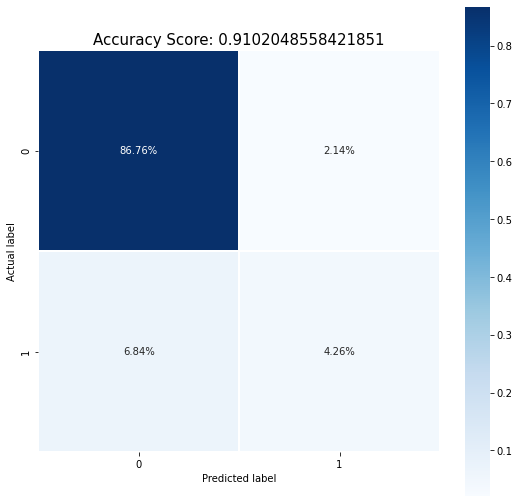

In [301]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

De los 

## Decision tree

Dado que las variables no son binarias, no es posible usar un modelo de Decision tree.
Ademas, al tener varias variables categoricas, de las que se puede elegir solo una de las categorías no es posible hacer un hot deck encoding porque se tiene que elegir exactamente una de las categorias